In [1]:
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import datetime
from tensorflow import keras
from tensorflow.keras.models import Model
import tensorflow as tf
# Importation du jeu de données
import pathlib
import os

In [2]:
img = plt.imread('data/anime_images/A Lull in the Sea/A Lull in the Sea_001.jpg')
img.shape

(163, 310, 3)

#  On load le data set

In [3]:
data_dir = pathlib.Path('data/anime_images')
print(data_dir)
print(os.path.abspath(data_dir))

data\anime_images
c:\Users\amich\Documents\ProjetIA\Projet-IA\data\anime_images


In [4]:
# Comptage du nombre d'images
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

83059


# On crée les 2 "axes" X=les images y=leurs labels

In [5]:
images_path = list(data_dir.glob("*/*"))
images_Label = [element.parts[-2] for element in images_path]
images_train = [cv2.imread(str(image), 1) for image in images_path]

KeyboardInterrupt: 

TypeError: Image data of dtype object cannot be converted to float

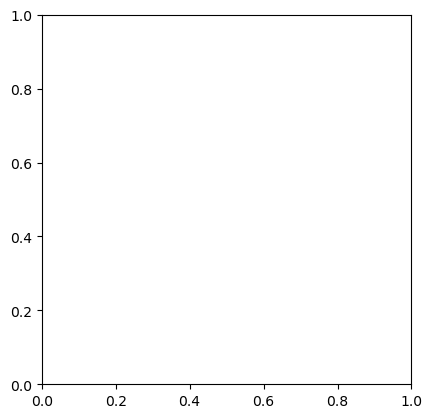

In [ ]:
# Paramètres pour la création des ensembles de données
batch_size = 3
img_height = 200
img_width = 200

# Création des ensembles de données d'entraînement et de validation
train_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Noms de classe
class_names = val_data.class_names
print(class_names)

In [ ]:
# Affichage des images d'exemple
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

 # initialisaton du model

In [6]:
layers=tf.keras.layers



# Définition du modèle CNN
num_classes = 230 # nombre de dossier
model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(128,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Chargement des poids
model.load_weights('model_weights.h5')

# Compilation du modèle
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'],)

AttributeError: module 'keras._tf_keras.keras.layers' has no attribute 'experimental'

In [ ]:
# Callback pour TensorBoard
logdir="logs"
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir,histogram_freq=1, write_images=logdir,
                                                   embeddings_data=train_data)

On entraine le model sur les donnée train_data/val_data, se qui nous return l'acuracy du model

In [ ]:

# Entraînement du modèle
model.fit( 
    train_data,
    validation_data=val_data,
    epochs=2,
    callbacks=[tensorboard_callback]
)

Epoch 1/2


2024-05-15 22:21:08.734071: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [126]
	 [[{{node Placeholder/_4}}]]
2024-05-15 22:21:08.734349: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [126]
	 [[{{node Placeholder/_4}}]]
/home/ssea2/anaconda3/envs/IA3-11-9/lib/python3.11/site-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logi

 4/42 [=>............................] - ETA: 12s - loss: 0.2377 - accuracy: 0.7500   

2024-05-15 22:21:11.470181: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/42 [===============>..............] - ETA: 6s - loss: 0.0413 - accuracy: 0.9565

2024-05-15 22:21:17.464294: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/42 [==============================] - ETA: 0s - loss: 0.0226 - accuracy: 0.9762

2024-05-15 22:21:23.106230: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [31]
	 [[{{node Placeholder/_4}}]]
2024-05-15 22:21:23.108635: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [31]
	 [[{{node Placeholder/_0}}]]


42/42 [==============================] - 16s 348ms/step - loss: 0.0226 - accuracy: 0.9762 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/2
 4/42 [=>............................] - ETA: 8s - loss: 0.0000e+00 - accuracy: 1.0000

2024-05-15 22:21:25.745809: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/42 [===============>..............] - ETA: 5s - loss: 0.0000e+00 - accuracy: 1.0000

2024-05-15 22:21:31.931997: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/42 [==============================] - 14s 342ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


# Extraction des poids

In [ ]:
# Extraire les poids de toutes les couches
all_weights = [layer.get_weights() for layer in model.layers]

for i, weights in enumerate(all_weights):
    print(f"Couches {i} :")
    print(weights)

# Sauvegarder les poids dans un fichier
model.save_weights('model_weights.h5')

In [ ]:
"""
# Fonction pour afficher les filtres de convolution
def display_filter(model, layer_name):
    layer = model.get_layer(layer_name)
    filter, bias= layer.get_weights()
    dim = filter.shape[3]
    print(f'{layer_name} | Filter Shape: {filter.shape} Bias Shape: {bias.shape}')
    print(f'Dimension {dim}')
    f_min, f_max = filter.min(), filter.max()
    filter = (filter - f_min) / (f_max - f_min)
    print(filter.shape)
    fig= plt.figure(figsize=(30,30))
    for i in range(dim):
        ax = fig.add_subplot(dim/2,dim/2,i+1)
        ax.axis('off')
        try:
            ax.imshow(filter[:,:,:,i])
        except:
            ax.imshow(filter[:,:,:,i][0])

# Affichage des filtres de convolution
display_filter(model,f'conv2d_{num}')"""

"\n# Fonction pour afficher les filtres de convolution\ndef display_filter(model, layer_name):\n    layer = model.get_layer(layer_name)\n    filter, bias= layer.get_weights()\n    dim = filter.shape[3]\n    print(f'{layer_name} | Filter Shape: {filter.shape} Bias Shape: {bias.shape}')\n    print(f'Dimension {dim}')\n    f_min, f_max = filter.min(), filter.max()\n    filter = (filter - f_min) / (f_max - f_min)\n    print(filter.shape)\n    fig= plt.figure(figsize=(30,30))\n    for i in range(dim):\n        ax = fig.add_subplot(dim/2,dim/2,i+1)\n        ax.axis('off')\n        try:\n            ax.imshow(filter[:,:,:,i])\n        except:\n            ax.imshow(filter[:,:,:,i][0])\n\n# Affichage des filtres de convolution\ndisplay_filter(model,f'conv2d_{num}')"